In [ ]:
import xml.etree.ElementTree as ET
import random
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
def generate_last_12_months():
    today = datetime.today()
    current_year = today.year
    current_month = today.month
    months = []
    for i in range(12):
        year = current_year
        month = current_month - i
        if month <= 0:
            month += 12
            year -= 1
        months.append(f"{year}-{month:02d}")
    months.reverse()
    return months

months = generate_last_12_months()
print("Последние 12 месяцев:", months)

Последние 12 месяцев: ['2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12', '2025-01', '2025-02', '2025-03']


In [ ]:
def parse_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    shop = root.find('shop')
    offers = shop.find('offers').findall('offer')

    models = []
    for offer in offers:
        model_id = offer.get('id')
        model_name = offer.find('name').text
        models.append({'id': model_id, 'name': model_name})
    return models

xml_file = 'couches.xml'
models = parse_xml(xml_file)

print("\nСписок моделей:")
for model in models:
    print(f"ID: {model['id']}, Название: {model['name']}")


Список моделей:
ID: 491226, Название: Кресло Pero с подлокотниками FIRST
ID: 491227, Название: Диван Brioche FIRST 2-х местный с широкими подлокотниками
ID: 491228, Название: Диван Brioche Premier угловой пр/лев с широкими подлокотниками


In [ ]:
def generate_sales_dataframe(models, months):
    data = []
    for model in models:
        for month in months:
            sales = random.randint(0, 100)
            data.append({
                'Model': model['name'],
                'Month': month,
                'Sales': sales
            })
    return pd.DataFrame(data)

sales_df = generate_sales_dataframe(models, months)

print("\nПервые строки таблицы продаж:")
display(sales_df.head())


Первые строки таблицы продаж:


,Model,Month,Sales
0,Кресло Pero с подлокотниками FIRST,2024-04,21
1,Кресло Pero с подлокотниками FIRST,2024-05,63
2,Кресло Pero с подлокотниками FIRST,2024-06,51
3,Кресло Pero с подлокотниками FIRST,2024-07,61
4,Кресло Pero с подлокотниками FIRST,2024-08,30


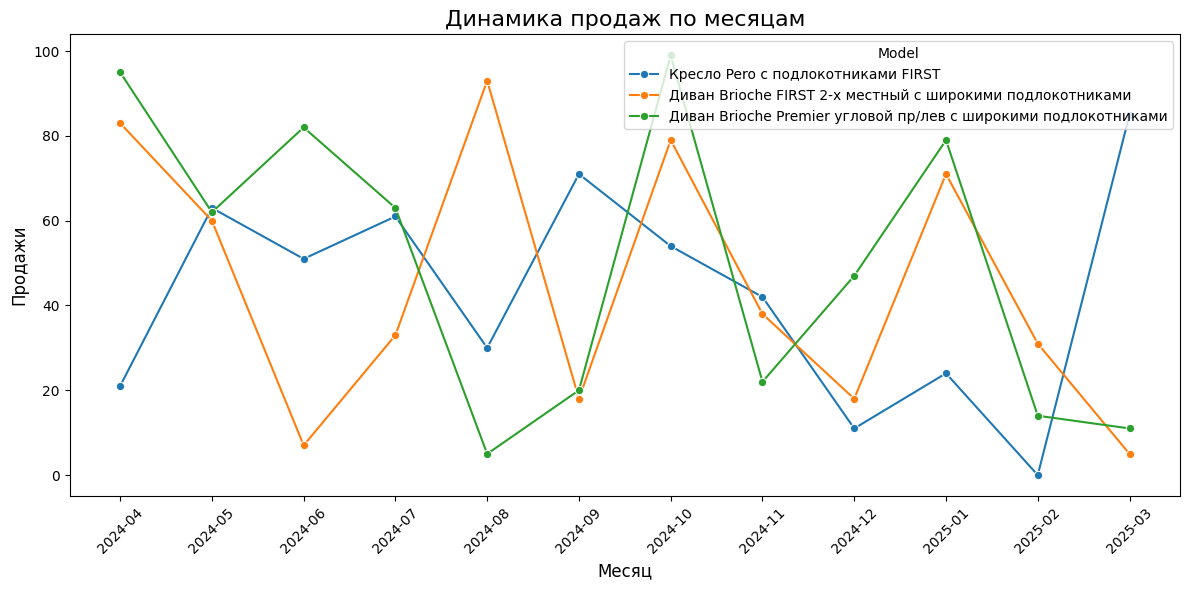

In [ ]:
def visualize_sales(df):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Month', y='Sales', hue
    ='Model', marker='o')

    plt.title('Динамика продаж по месяцам', fontsize=16)
    plt.xlabel('Месяц', fontsize=12)
    plt.ylabel('Продажи', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

visualize_sales(sales_df)


Общие продажи по каждой модели:


,Model,Total Sales
0,Диван Brioche FIRST 2-х местный с широкими под...,536
1,Диван Brioche Premier угловой пр/лев с широким...,599
2,Кресло Pero с подлокотниками FIRST,513


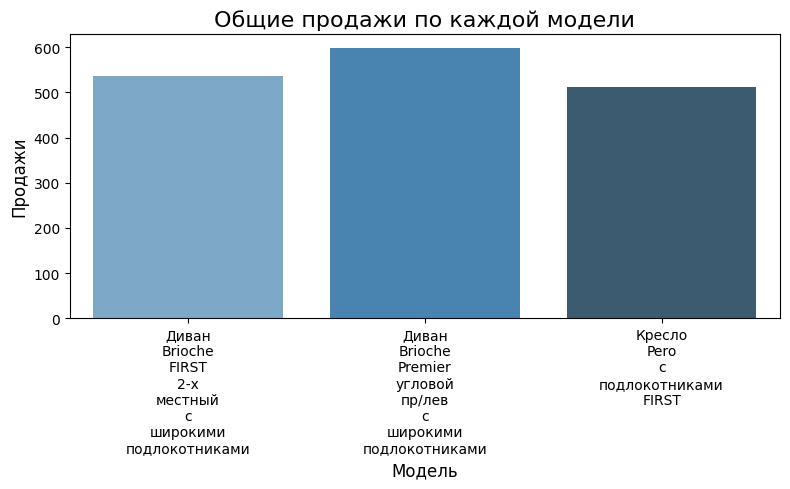

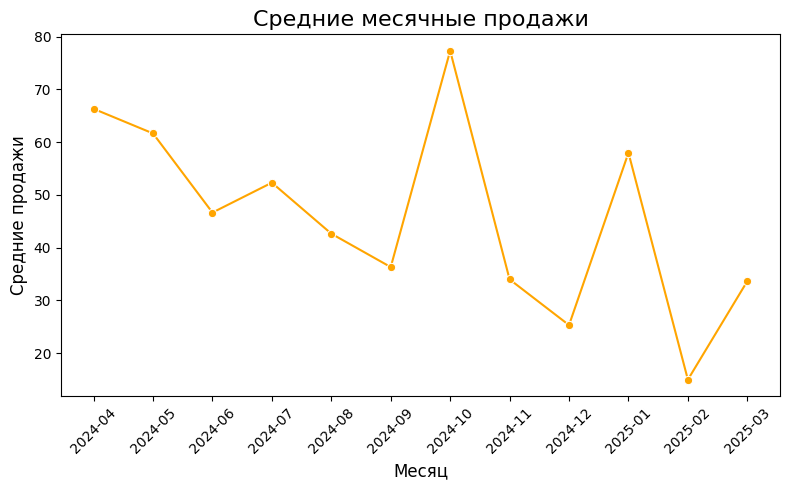

In [ ]:
# Общие продажи по каждой модели
total_sales_by_model = sales_df.groupby('Model')['Sales'].sum().reset_index()
total_sales_by_model.columns = ['Model', 'Total Sales']

print("\nОбщие продажи по каждой модели:")
display(total_sales_by_model)

total_sales_by_model['Model'] = total_sales_by_model['Model'].apply(lambda x: '\n'.join(x.split()))

plt.figure(figsize=(8, 5))
sns.barplot(data=total_sales_by_model, x='Model', y='Total Sales', hue = 'Model', legend=False, palette='Blues_d')
plt.title('Общие продажи по каждой модели', fontsize=16)
plt.xlabel('Модель', fontsize=12)
plt.ylabel('Продажи', fontsize=12)

plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Линейный график средних месячных продаж
plt.figure(figsize=(8, 5))
sns.lineplot(data=monthly_avg_sales, x='Month', y='Average Sales', marker='o', color='orange')
plt.title('Средние месячные продажи', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Средние продажи', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()